In [157]:
import os 


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [159]:
stores = pd.read_csv('Train iNeuron.csv')

In [160]:
stores.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [161]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [162]:
stores.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [163]:
### check the missing value
features_with_na=[feature for feature in stores.columns if stores[feature].isnull().sum()>1]
print('feature with na {}'.format(len(features_with_na)))

feature with na 2


In [164]:
for feature in features_with_na:
    print(feature, np.round(stores[feature].isnull().mean(), 4), '%missing feature' )





Item_Weight 0.1717 %missing feature
Outlet_Size 0.2828 %missing feature


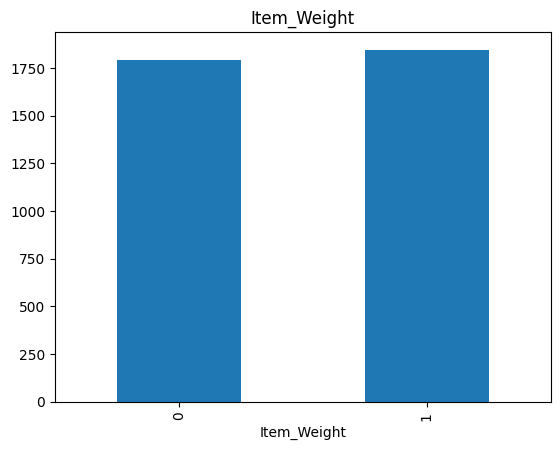

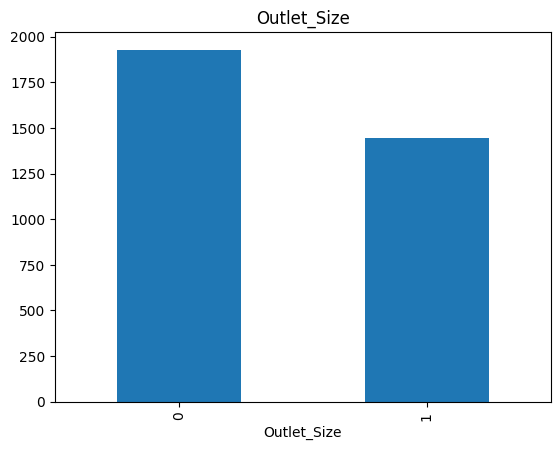

In [165]:
for feature in features_with_na:
    data = stores.copy()

    #lets make a variable that indicate 1 if the observation was missing and 0 if otherwise
    data[feature] = np.where(stores[feature].isnull(), 1, 0)

     # lets calculate the mean Item_Outlet_Sales where the information is missing or present
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()


In [166]:
# list of numerical variables
numerical_feature = [feature for feature in stores.columns if stores[feature].dtypes != '0']
print('numerical feature {}'.format(len(numerical_feature)))

#visualize the numerical variables
stores[numerical_feature].head()

numerical feature 12


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [167]:
year_feature = [feature for feature in numerical_feature if 'Year' in feature]
 
year_feature


['Outlet_Establishment_Year']

In [168]:
for feature in year_feature:
    print(feature, stores[feature].unique())

Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]


Text(0.5, 1.0, 'outlet year vs outlet sold')

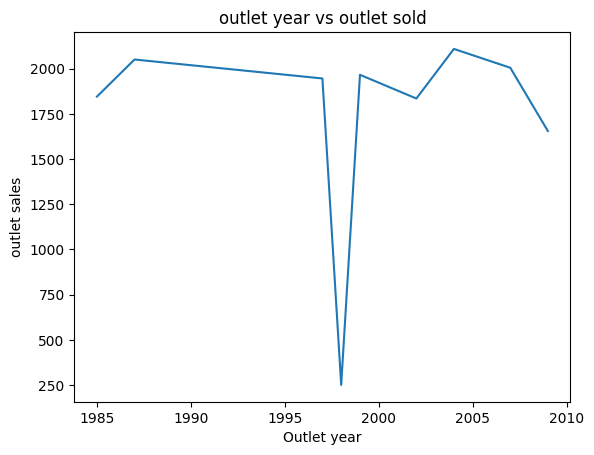

In [169]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('Outlet year')
plt.ylabel('outlet sales')
plt.title('outlet year vs outlet sold')

In [170]:
# looking fo discrete variable 
discrete_feature=[feature for feature in numerical_feature if len(stores[feature].unique())<25 and feature not in year_feature]
print('discrete variable count {}'.format(len(discrete_feature)))

discrete variable count 6


In [171]:
discrete_feature

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

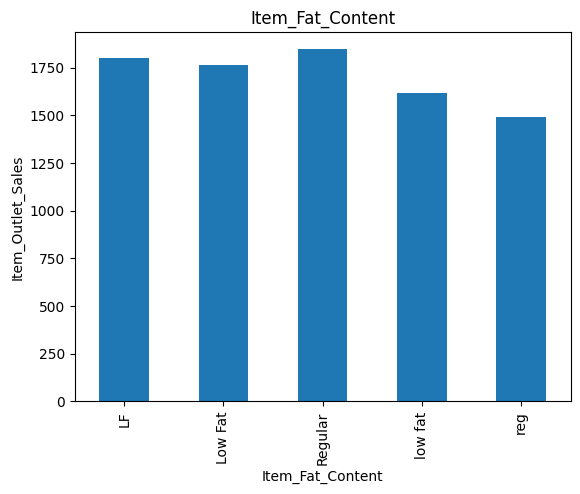

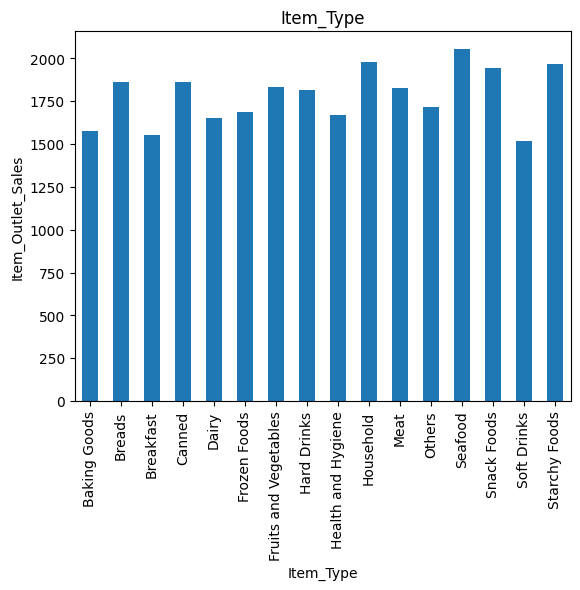

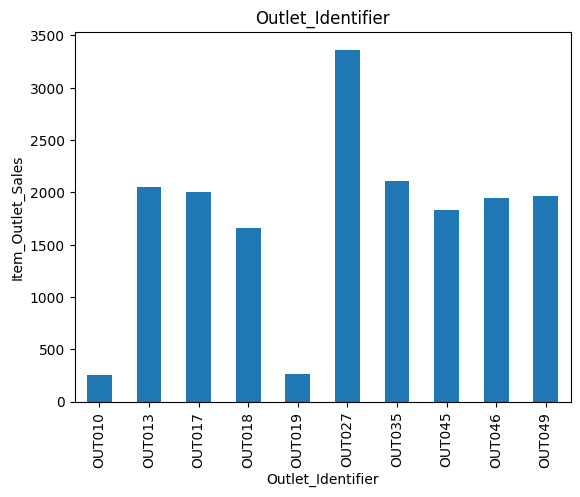

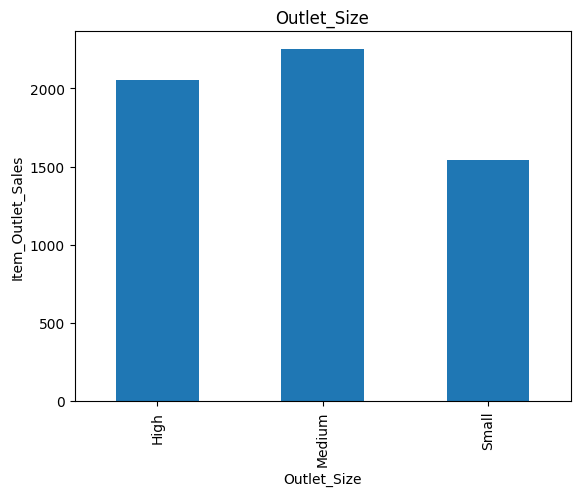

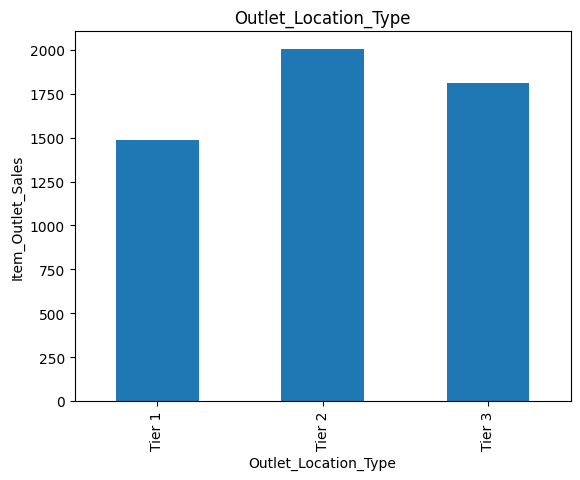

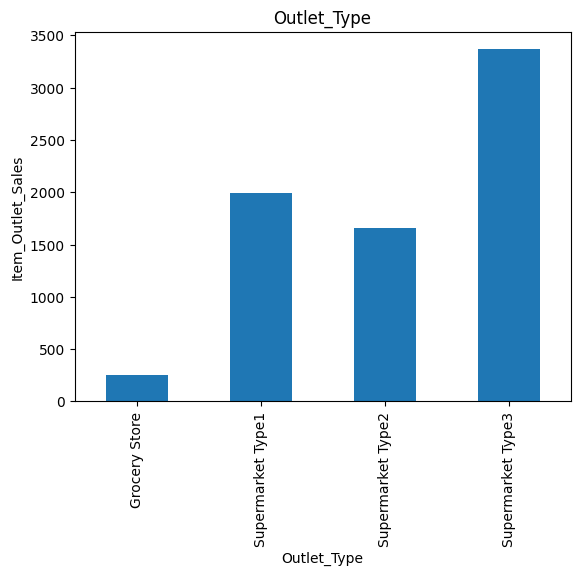

In [172]:
for feature in discrete_feature:
    data = stores.copy()
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(feature)
    plt.show()

In [173]:
#looking for continuous features 
continuous_feature =[feature for feature in numerical_feature if feature not in discrete_feature+year_feature]
print('continuous features {}'.format(len(continuous_feature)))

continuous features 5


In [174]:
continuous_feature

['Item_Identifier',
 'Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales']

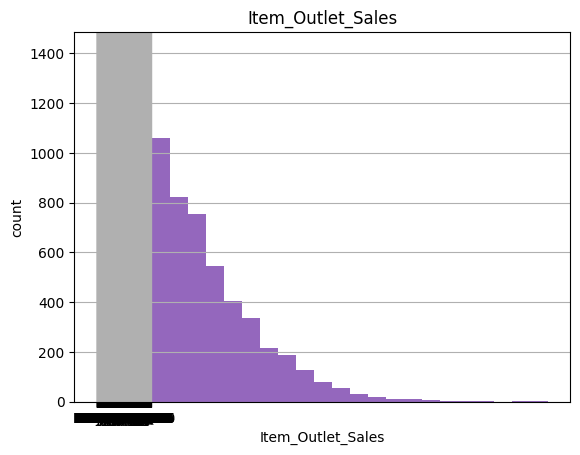

In [175]:
# using histogram to display the relationship between them 
for feature in continuous_feature:
    data = stores.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show

c:\Users\hp\Anaconda3\envs\mlproj\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


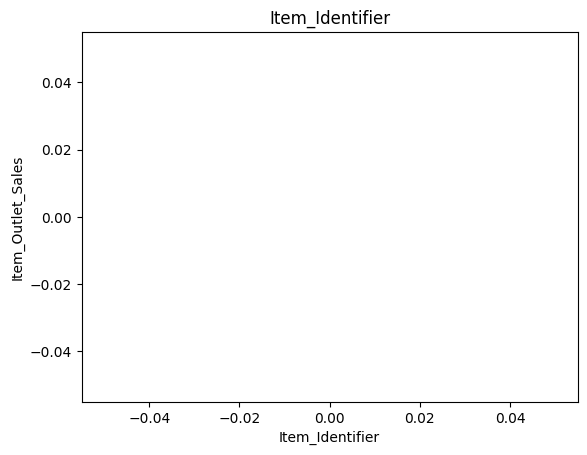

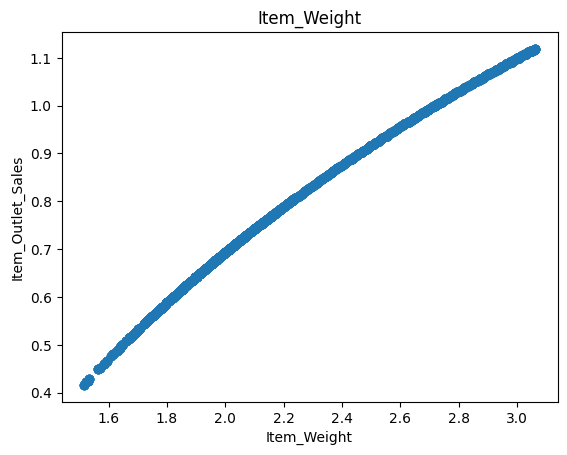

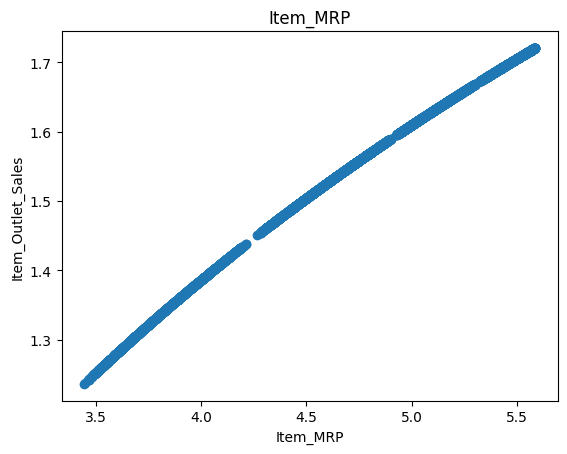

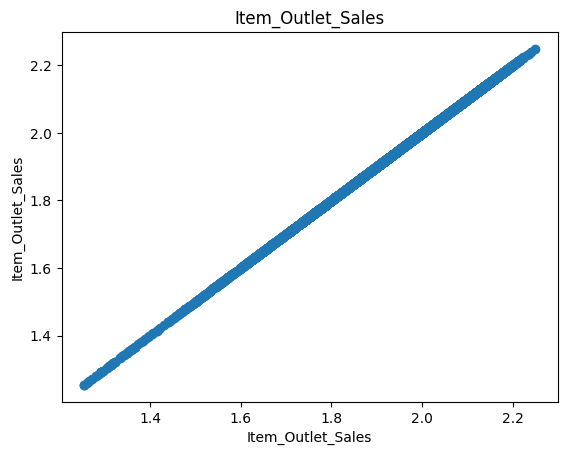

In [176]:
## we will be using logarithmic transformation
for feature in continuous_feature:
    data = stores.copy()
    data[feature]=pd.to_numeric(data[feature], errors = 'coerce')
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature]).fillna(0)
        data['Item_Outlet_Sales'] = np.log(data[feature]).fillna(0)
        plt.scatter(data[feature], data['Item_Outlet_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(feature)
        plt.show()

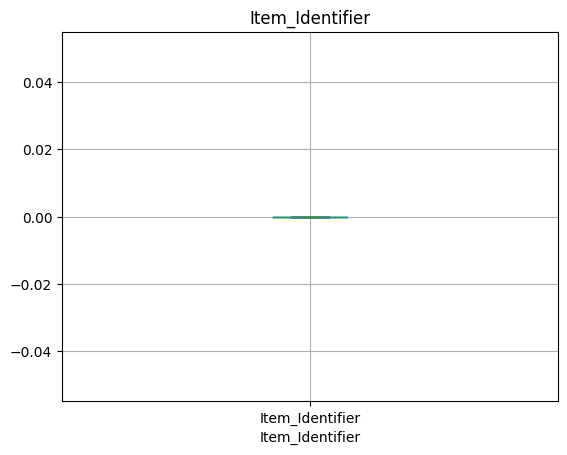

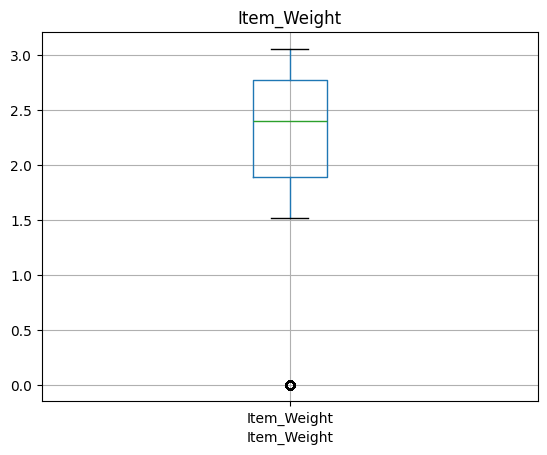

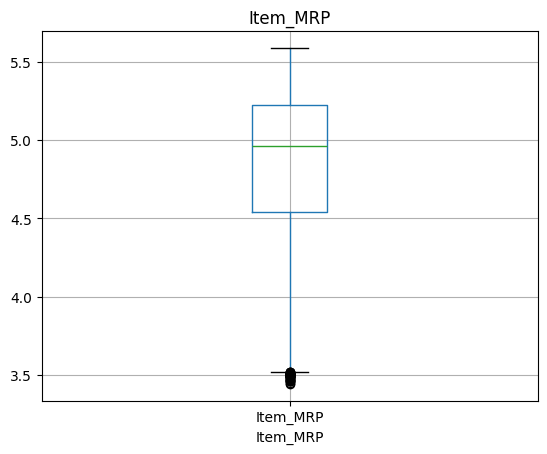

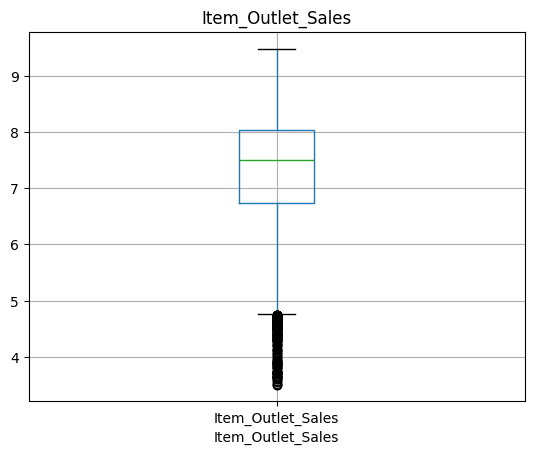

In [177]:
## Outliers
for feature in continuous_feature:
    data= stores.copy()
    data[feature]= pd.to_numeric(data[feature],errors='coerce')
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature]).fillna(0)
        data.boxplot(column = feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

In [178]:
categorical_feature=[feature for feature in stores.columns if data[feature].dtypes=='0']
print('categorical_feature{}'.format(len(categorical_feature)))

categorical_feature0


In [179]:
# feature engineering 
from sklearn.model_selection import train_test_split

In [180]:
stores.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [181]:
X = stores.drop(['Item_Outlet_Sales'], axis =1)
Y = stores['Item_Outlet_Sales']

In [182]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [183]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [184]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [185]:
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(X_test.shape)


(6818,)
(1705,)
(6818, 11)
(1705, 11)


In [186]:

print("Missing values in X_train:", pd.DataFrame(X_train).isnull().sum().sum())
print("Missing values in Y_train:", pd.isnull(Y_train).sum())


Missing values in X_train: 3109
Missing values in Y_train: 0


In [187]:


# Convert X_train to a DataFrame if it's not already
X_train = pd.DataFrame(X_train)

# Separate numeric and non-numeric columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

print("Numeric Columns:", numeric_cols)
print("Non-Numeric Columns:", non_numeric_cols)




Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')
Non-Numeric Columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [188]:
from sklearn.impute import SimpleImputer

# Impute missing values for numeric columns
num_imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])



In [189]:
# Impute missing values for non-numeric columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[non_numeric_cols] = cat_imputer.fit_transform(X_train[non_numeric_cols])


In [190]:
from sklearn.preprocessing import LabelEncoder

for col in non_numeric_cols:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col])



In [191]:
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)


In [192]:

# Check for any remaining issues
print("Any NaN in X_train:", np.isnan(X_train).any())
print("Data types in X_train:", X_train.dtypes)


Any NaN in X_train: Item_Weight                  False
Item_Visibility              False
Item_MRP                     False
Outlet_Establishment_Year    False
Item_Identifier_1            False
                             ...  
Outlet_Location_Type_1       False
Outlet_Location_Type_2       False
Outlet_Type_1                False
Outlet_Type_2                False
Outlet_Type_3                False
Length: 1593, dtype: bool
Data types in X_train: Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year    float64
Item_Identifier_1               bool
                              ...   
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
Length: 1593, dtype: object


In [193]:
# using elasticnet 
from sklearn.linear_model import ElasticNet

In [194]:

lr = ElasticNet(alpha =0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train,Y_train)

ElasticNet(alpha=0.1, random_state=42)

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np


In [200]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [197]:



# Align columns with the training data




In [202]:
# Check column differences
missing_in_test = set(X_train.columns) - set(X_test.columns)
extra_in_test = set(X_test.columns) - set(X_train.columns)

print("Columns in X_train but not in X_test:", missing_in_test)
print("Columns in X_test but not in X_train:", extra_in_test)


Columns in X_train but not in X_test: {'Item_Identifier_314', 'Item_Identifier_466', 'Item_Identifier_1241', 'Item_Identifier_717', 'Item_Identifier_1507', 'Item_Identifier_578', 'Item_Identifier_487', 'Item_Identifier_304', 'Item_Identifier_508', 'Item_Identifier_965', 'Item_Identifier_506', 'Item_Identifier_982', 'Item_Identifier_221', 'Item_Identifier_1405', 'Item_Identifier_635', 'Item_Identifier_1178', 'Item_Identifier_507', 'Item_Identifier_615', 'Item_Identifier_138', 'Item_Identifier_1330', 'Item_Identifier_277', 'Item_Identifier_686', 'Item_Identifier_416', 'Item_Identifier_208', 'Item_Identifier_745', 'Item_Identifier_980', 'Item_Identifier_1324', 'Item_Identifier_998', 'Item_Identifier_1095', 'Item_Identifier_83', 'Item_Identifier_529', 'Item_Identifier_523', 'Item_Identifier_619', 'Item_Identifier_1195', 'Item_Identifier_1205', 'Item_Identifier_462', 'Item_Identifier_885', 'Item_Identifier_727', 'Item_Identifier_545', 'Item_Identifier_935', 'Item_Identifier_172', 'Item_Iden

In [203]:
# Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [207]:
from sklearn.preprocessing import StandardScaler

# Step 1: Create the scaler
scaler = StandardScaler()

# Step 2: Fit the scaler on X_train
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)


In [209]:
predicted_value =  lr.predict(X_test)


ValueError: Input X contains NaN.
ElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
predicted_value

array([1253.01569681,  700.10395064,  586.48395643, ...,  663.46546123,
        700.54875172, 1709.62874558])

In [ ]:
(rmse, mae, r2) = eval_metrics(Y_test, predicted_value) 

In [ ]:
print('rmse = ', rmse)
print('mae = ', mae)
print('r2 = ', r2)

rmse =  1346.7347529790472
mae =  989.9689093273502
r2 =  0.33270254990733295
